In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder

#                                  Please Note
Note: The dataset is synthetic and it's accuracy of the data is not good 
This is because the dataset for this type of project is not available anywhere online

In [2]:
df = pd.read_csv('completed_12th.csv')
df.head(10)

,Physics,Maths,Chemistry,Biology,Mean,Locality,Budget,Entrance,prev_stream,College_Section
0,72,72,71,74,85.6,Nashik,80000.0,139,Diploma,1
1,69,90,68,88,90.4,Nashik,70000.0,137,Diploma,1
2,90,95,89,93,88.6,Mumbai,30000.0,76,Commerce,1
3,47,57,46,44,74.2,Pune,190000.0,177,Diploma,1
4,76,78,75,75,79.2,Mumbai,140000.0,92,Commerce,1
5,71,83,70,78,87.2,Mumbai,80000.0,134,Diploma,1
6,88,95,87,92,94.2,Nashik,130000.0,109,Arts,1
7,40,43,39,39,57.2,Pune,90000.0,125,Diploma,1
8,64,64,63,67,75.4,Mumbai,90000.0,119,Science,1
9,38,60,37,50,56.0,Nashik,170000.0,95,Diploma,1


# Visualizing of Numerical Features

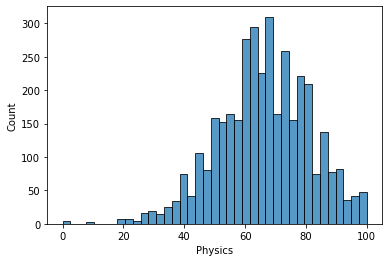

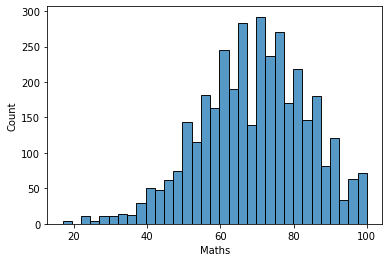

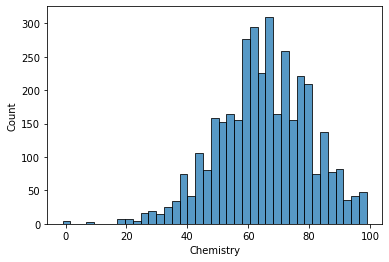

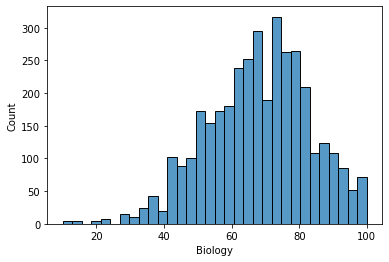

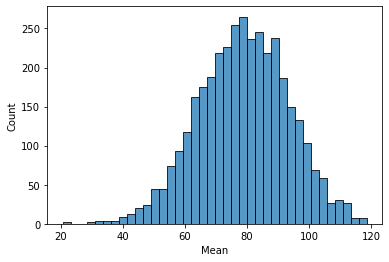

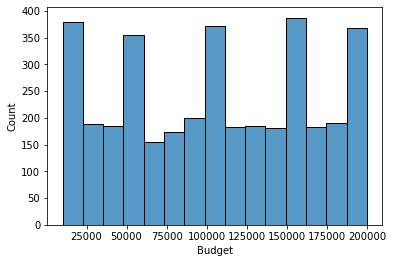

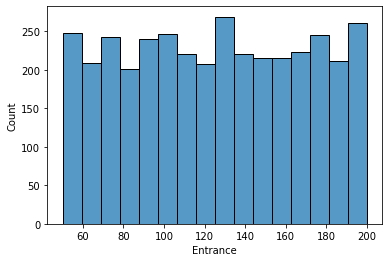

In [3]:
for feature in df.columns:
    if df[feature].dtypes != 'O' and feature != 'College_Section':
        sns.histplot(x=feature,data=df)
        plt.show()

# Visualizing categorical Features

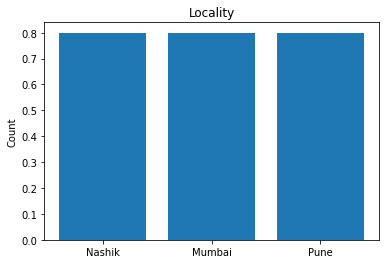

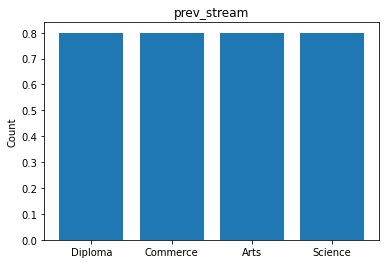

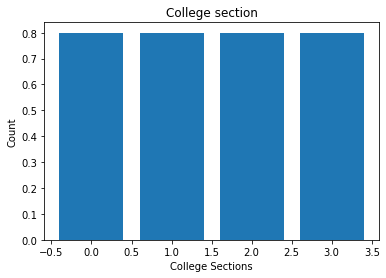

In [4]:
plt.bar(df['Locality'],0.8)
plt.title('Locality')
plt.ylabel('Count')
plt.show()

plt.bar(df['prev_stream'],0.8)
plt.ylabel('Count')
plt.title('prev_stream')
plt.show()

plt.bar(df['College_Section'],0.8)
plt.title('College section')
plt.xlabel('College Sections')
plt.ylabel('Count')
plt.show()

# Correlation between Independent Features and Dependent Features

In [5]:
le = LabelEncoder()
df['prev_stream'] = le.fit_transform(df['prev_stream'])
df['Locality'] = le.fit_transform(df['Locality'])
df.head()

,Physics,Maths,Chemistry,Biology,Mean,Locality,Budget,Entrance,prev_stream,College_Section
0,72,72,71,74,85.6,1,80000.0,139,2,1
1,69,90,68,88,90.4,1,70000.0,137,2,1
2,90,95,89,93,88.6,0,30000.0,76,1,1
3,47,57,46,44,74.2,2,190000.0,177,2,1
4,76,78,75,75,79.2,0,140000.0,92,1,1


<AxesSubplot:>

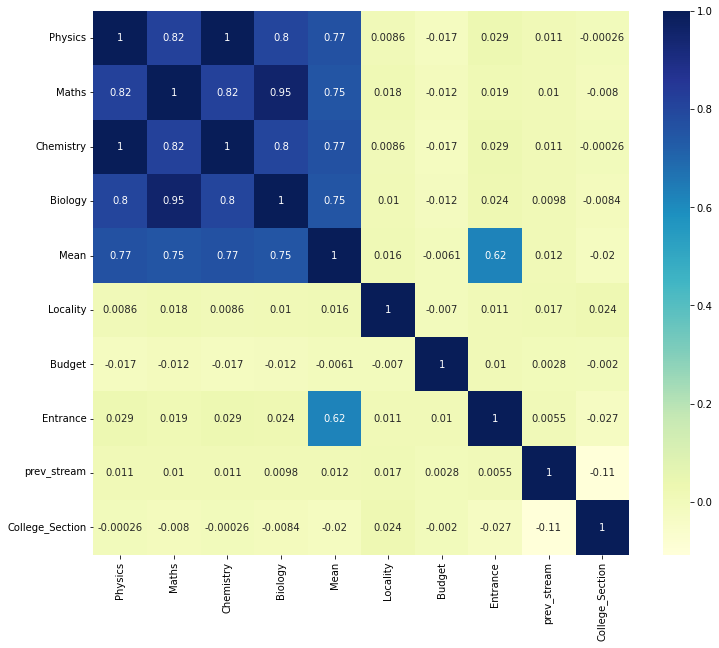

In [6]:
matriz_corr = df.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(matriz_corr, cmap='YlGnBu', annot = True)

# Model Building

In [7]:
X = df[['Physics','Maths','Chemistry','Biology','Mean','Locality','Budget','Entrance','prev_stream']]
y = df['College_Section']

scaled_X = StandardScaler()

X = scaled_X.fit_transform(X)
X

array([[ 0.39208582,  0.19594483,  0.39208582, ..., -0.43926923,
         0.31695668,  0.83737545],
       [ 0.19379657,  1.42905616,  0.19379657, ..., -0.61197177,
         0.27111359,  0.83737545],
       [ 1.58182136,  1.77158708,  1.58182136, ..., -1.30278192,
        -1.12710041, -0.22355011],
       ...,
       [-1.06203538, -0.35210466, -1.06203538, ...,  0.59694599,
         0.500329  ,  0.83737545],
       [ 0.45818224,  0.60698194,  0.45818224, ...,  1.46045868,
        -1.42508044,  0.83737545],
       [ 0.25989299,  0.88100668,  0.25989299, ..., -0.2665667 ,
         0.63785825, -1.28447567]])

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=42)
X_test.shape

(736, 9)

In [9]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)

In [10]:
models = {"Support Vector Machine":SVC(),
       "DecisionTreeClassifier":DecisionTreeClassifier(),
       "LogisticRegression":LogisticRegression(),
       "XGBClassifier":XGBClassifier(),
       "CatBoostClassifier":CatBoostClassifier(verbose=False),
       "KNeighborsClassifier":KNeighborsClassifier(),
       "AdaBoostClassifier":AdaBoostClassifier(),
       "GradientBoostingClassifier":GradientBoostingClassifier(),
       "RandomForestClassifier":RandomForestClassifier()}

In [11]:
scores = {}
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    res = accuracy_score(y_pred,y_test)
    scores[name] = res
    
sorted_dict = sorted(scores.items(),key= lambda x:x[1],reverse=True)
sorted_dict

[('KNeighborsClassifier', 0.33152173913043476),
 ('Support Vector Machine', 0.33016304347826086),
 ('LogisticRegression', 0.32472826086956524),
 ('GradientBoostingClassifier', 0.3138586956521739),
 ('AdaBoostClassifier', 0.29891304347826086),
 ('XGBClassifier', 0.296195652173913),
 ('CatBoostClassifier', 0.29483695652173914),
 ('RandomForestClassifier', 0.28396739130434784),
 ('DecisionTreeClassifier', 0.2826086956521739)]